In [1]:
import pandas as pd


In [6]:
demand_time = pd.read_csv("../../Resources/data/Summary_statistics_for_ML.csv", encoding = 'unicode_escape')
demand_time


,facilityid,median_orderdate_to_startdate,average_orderdate_to_startdate,average_nights,median_nights
0,118440.0,20.0,40.250000,3.310345,3.0
1,119090.0,30.0,55.371438,2.479231,2.0
2,119140.0,21.0,42.118890,2.414531,2.0
3,119190.0,21.0,37.293520,3.060991,2.0
4,119240.0,21.5,44.950943,2.690566,2.0
...,...,...,...,...,...
964,10039993.0,31.0,53.426573,2.505245,2.0
965,10040012.0,147.0,136.445161,3.232258,3.0
966,10040022.0,13.0,39.441509,2.252830,2.0
967,10040047.0,37.0,53.171942,2.660821,3.0


In [3]:
WestCoast_facilities = pd.read_csv("../../Resources/data/West_Coast_activities_facilities_reservations.csv", encoding = 'unicode_escape')
WestCoast_facilities

,FacilityID,OrgFacilityID,ParentRecAreaID,FacilityName,FacilityLongitude,FacilityLatitude,NumberofCampsites,ActivityName,NumberofReservations,PostalCode,AddressStateCode
0,10004152,128,2991.0,Camp 4,-119.603357,37.741426,37,NaN,3826,CA,95389
1,10004932,128,2845.0,Gorge Lake Campground,-121.151532,48.715713,8,"BOATING,FISHING,WATER ACCESS,KAYAKING,CANOEING",905,WA,98284
2,10039887,131,1077.0,Dark Day Campground,-121.108633,39.431283,10,"BOATING,CAMPING,FISHING,WILDLIFE VIEWING,BIKIN...",591,CA,95922
3,10039993,131,1077.0,Garden Point Boat-in Campground,-121.124367,39.433317,16,"BOATING,CAMPING,FISHING,WATER ACCESS,WATER SPO...",572,CA,95922
4,10040012,131,1077.0,Hornswoggle Group Campground,-121.120117,39.414933,6,"BOATING,CAMPING,FISHING,BIKING,HIKING,PICNICKI...",155,CA,95922
...,...,...,...,...,...,...,...,...,...,...,...
887,273782,131,14492.0,SODA CREEK CAMPGROUND,-121.726756,44.025536,10,CAMPING,1207,OR,97701
888,273799,131,1116.0,GILLETTE CAMPGROUND,-117.534167,48.612500,30,"CAMPING,FISHING,WILDLIFE VIEWING",416,WA,99153
889,273816,131,1064.0,CEDAR FLAT GROUP CAMPGROUND,-118.151472,37.277008,3,CAMPING,147,CA,93514
890,273820,131,1116.0,LAKE GILLETTE CAMPGROUND,-117.538611,48.612500,14,"BOATING,CAMPING,FISHING,WILDLIFE VIEWING,BIKIN...",375,WA,99153


In [4]:
WestCoast_facilities["demand"] = WestCoast_facilities["NumberofReservations"]/WestCoast_facilities["NumberofCampsites"]


In [5]:
WestCoast_facilities.columns

Index(['FacilityID', 'OrgFacilityID', 'ParentRecAreaID', 'FacilityName',
       'FacilityLongitude', 'FacilityLatitude', 'NumberofCampsites',
       'ActivityName', 'NumberofReservations', 'PostalCode',
       'AddressStateCode', 'demand'],
      dtype='object')

In [6]:
facilities_demand_ML = WestCoast_facilities.drop(columns=['OrgFacilityID', 
                                                              'ParentRecAreaID', 'FacilityName',
                                                              'FacilityLongitude', 'FacilityLatitude', 
                                                              'ActivityName', 
                                                              'PostalCode',
                                                              'AddressStateCode'
                                                              ])
facilities_demand_ML = facilities_demand_ML.rename(columns={"FacilityID": "facilityid",
                                                            "NumberofCampsites": "numberofcampsites",
                                                            "NumberofReservations": "number_of_reservations"})
facilities_demand_ML

,facilityid,numberofcampsites,number_of_reservations,demand
0,10004152,37,3826,103.405405
1,10004932,8,905,113.125000
2,10039887,10,591,59.100000
3,10039993,16,572,35.750000
4,10040012,6,155,25.833333
...,...,...,...,...
887,273782,10,1207,120.700000
888,273799,30,416,13.866667
889,273816,3,147,49.000000
890,273820,14,375,26.785714


In [7]:
facilities_clustering_ML = facilities_demand_ML.merge(demand_time, on="facilityid", how="inner")
facilities_clustering_ML

,facilityid,numberofcampsites,number_of_reservations,demand,median_orderdate_to_startdate,average_orderdate_to_startdate,average_nights,median_nights
0,10004152,37,3826,103.405405,1.0,0.989545,2.327757,2.0
1,10004932,8,905,113.125000,41.0,61.815470,1.844199,2.0
2,10039887,10,591,59.100000,33.0,56.714044,2.037225,2.0
3,10039993,16,572,35.750000,31.0,53.426573,2.505245,2.0
4,10040012,6,155,25.833333,147.0,136.445161,3.232258,3.0
...,...,...,...,...,...,...,...,...
887,273782,10,1207,120.700000,24.0,41.971831,1.942005,2.0
888,273799,30,416,13.866667,15.0,34.423077,2.757212,2.0
889,273816,3,147,49.000000,90.0,108.846154,3.342657,2.0
890,273820,14,375,26.785714,22.0,49.517333,2.600000,2.0


In [8]:
facilities_clustering_ML = facilities_clustering_ML.drop(columns=["facilityid",
                                                                  "average_nights",
                                                                  "number_of_reservations"], axis=1)
facilities_clustering_ML

,numberofcampsites,demand,median_orderdate_to_startdate,average_orderdate_to_startdate,median_nights
0,37,103.405405,1.0,0.989545,2.0
1,8,113.125000,41.0,61.815470,2.0
2,10,59.100000,33.0,56.714044,2.0
3,16,35.750000,31.0,53.426573,2.0
4,6,25.833333,147.0,136.445161,3.0
...,...,...,...,...,...
887,10,120.700000,24.0,41.971831,2.0
888,30,13.866667,15.0,34.423077,2.0
889,3,49.000000,90.0,108.846154,2.0
890,14,26.785714,22.0,49.517333,2.0


In [9]:
dummy = WestCoast_facilities["ActivityName"].str.get_dummies(sep=',')
dummy

,ALL TERRAIN/OHV,DIFFICULT HIKING,HORSE,ACCESSIBLE SWIMMING,AMPHITHEATER,AUTO TOURING,BACKPACKING,BEACH CAMPING,BEACHCOMBING,BERRY PICKING,...,WATER ACTIVITIES,WATER SKIING,WATER SPORTS,WHALE WATCHING,WHITEWATER RAFTING,WILD HORSE VIEWING,WILDERNESS,WILDLIFE VIEWING,WINTER SPORTS,WOOD CUTTING
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(facilities_clustering_ML)
data_scaled = scaler.transform(facilities_clustering_ML)
data_scaled = pd.DataFrame(data_scaled, columns=facilities_clustering_ML.columns)
data_scaled.head()

,numberofcampsites,demand,median_orderdate_to_startdate,average_orderdate_to_startdate,median_nights
0,0.120000,0.198346,0.000000,0.000000,0.333333
1,0.023333,0.217013,0.155039,0.270013,0.333333
2,0.030000,0.113252,0.124031,0.247367,0.333333
3,0.050000,0.068406,0.116279,0.232774,0.333333
4,0.016667,0.049360,0.565891,0.601303,0.666667


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
import numpy as np 
from sklearn.decomposition import PCA 
import scipy.cluster.hierarchy as shc 

In [13]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(data_scaled) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

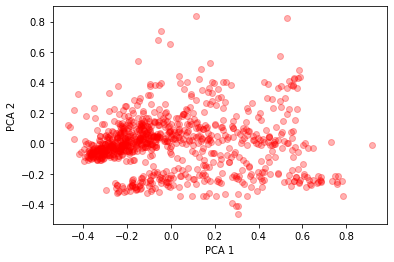

In [14]:

plt.scatter(X_principal["P1"], X_principal["P2"], alpha=.3, color='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

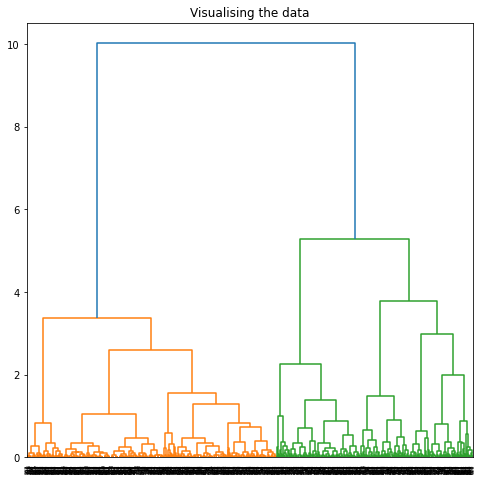

In [15]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

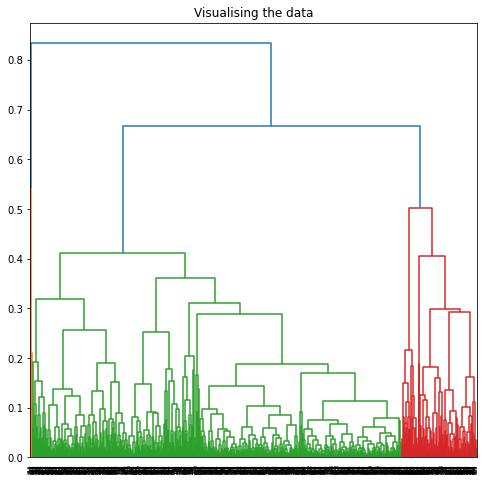

In [16]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='average'))) 

In [17]:
from sklearn.cluster import AgglomerativeClustering
ac1 = AgglomerativeClustering(n_clusters = 5, affinity='cosine', linkage='average')
ac2 = AgglomerativeClustering(n_clusters = 7, affinity='cosine', linkage='average')
ac3 = AgglomerativeClustering(n_clusters = 10, affinity='cosine', linkage='average')
ac4 = AgglomerativeClustering(n_clusters = 15, affinity='cosine', linkage='average')
ac5 = AgglomerativeClustering(n_clusters = 19, affinity='cosine', linkage='average')
ac6 = AgglomerativeClustering(n_clusters = 24, affinity='cosine', linkage='average')
ac7 = AgglomerativeClustering(n_clusters = 28, affinity='cosine', linkage='average')
ac8 = AgglomerativeClustering(n_clusters = 32, affinity='cosine', linkage='average')
ac9 = AgglomerativeClustering(n_clusters = 36, affinity='cosine', linkage='average')
ac10 = AgglomerativeClustering(n_clusters = 40, affinity='cosine', linkage='average')

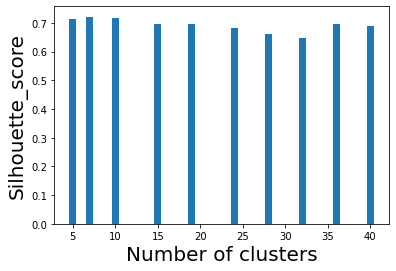

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score
k = [5, 7, 10, 15, 19, 24, 28, 32, 36, 40] 

silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, ac1.fit_predict(X_principal), metric="cosine")) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac2.fit_predict(X_principal), metric="cosine")) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac3.fit_predict(X_principal), metric="cosine")) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac4.fit_predict(X_principal), metric="cosine")) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac5.fit_predict(X_principal), metric="cosine")) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac6.fit_predict(X_principal), metric="cosine")) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac7.fit_predict(X_principal), metric="cosine")) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac8.fit_predict(X_principal), metric="cosine")) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac9.fit_predict(X_principal), metric="cosine")) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac10.fit_predict(X_principal), metric="cosine"))   

plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('Silhouette_score', fontsize = 20) 
plt.show() 

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=7, affinity='cosine', linkage='average')  
cluster.fit_predict(X_principal)

array([4, 4, 4, 4, 5, 4, 3, 3, 4, 4, 4, 4, 2, 4, 5, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 0, 5, 1, 1, 1, 5, 6, 1, 1, 5, 2, 0, 1, 2, 6, 4, 1, 1, 1, 1,
       4, 3, 4, 2, 4, 1, 2, 2, 1, 4, 4, 4, 3, 1, 5, 4, 1, 5, 3, 6, 2, 1,
       3, 4, 4, 4, 1, 5, 4, 2, 2, 0, 1, 1, 4, 5, 6, 4, 2, 5, 2, 5, 6, 0,
       1, 4, 1, 0, 0, 1, 4, 0, 5, 1, 4, 4, 5, 1, 2, 1, 1, 4, 4, 1, 2, 5,
       2, 5, 0, 0, 2, 4, 4, 4, 5, 6, 3, 2, 3, 4, 3, 3, 1, 5, 3, 5, 5, 3,
       0, 4, 3, 3, 6, 2, 0, 0, 5, 4, 4, 5, 1, 4, 1, 3, 0, 2, 1, 3, 4, 4,
       2, 1, 0, 6, 1, 4, 2, 2, 1, 1, 0, 4, 4, 4, 4, 0, 4, 1, 1, 4, 4, 5,
       5, 3, 6, 6, 4, 1, 1, 5, 1, 1, 4, 3, 3, 3, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 0, 1, 0, 0, 0, 4, 2, 0, 1, 0, 0, 0, 4, 3, 2, 1, 4,
       5, 2, 3, 3, 4, 3, 2, 3, 3, 6, 6, 6, 3, 6, 2, 0, 4, 5, 3, 5, 5, 0,
       4, 5, 1, 0, 1, 0, 1, 1, 5, 6, 4, 4, 4, 4, 4, 1, 4, 4, 2, 2, 3, 4,
       0, 4, 2, 5, 0, 4, 3, 2, 2, 3, 3, 4, 6, 5, 2, 4, 2, 1, 4, 2, 4, 4,
       3, 0, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2,

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(X_principal, cluster.labels_, metric='cosine')
print(score)

0.7217863762472223


In [21]:
WestCoast_facilities["Cluster"] = cluster.labels_

In [22]:
WestCoast_facilities

,FacilityID,OrgFacilityID,ParentRecAreaID,FacilityName,FacilityLongitude,FacilityLatitude,NumberofCampsites,ActivityName,NumberofReservations,PostalCode,AddressStateCode,demand,Cluster
0,10004152,128,2991.0,Camp 4,-119.603357,37.741426,37,NaN,3826,CA,95389,103.405405,4
1,10004932,128,2845.0,Gorge Lake Campground,-121.151532,48.715713,8,"BOATING,FISHING,WATER ACCESS,KAYAKING,CANOEING",905,WA,98284,113.125000,4
2,10039887,131,1077.0,Dark Day Campground,-121.108633,39.431283,10,"BOATING,CAMPING,FISHING,WILDLIFE VIEWING,BIKIN...",591,CA,95922,59.100000,4
3,10039993,131,1077.0,Garden Point Boat-in Campground,-121.124367,39.433317,16,"BOATING,CAMPING,FISHING,WATER ACCESS,WATER SPO...",572,CA,95922,35.750000,4
4,10040012,131,1077.0,Hornswoggle Group Campground,-121.120117,39.414933,6,"BOATING,CAMPING,FISHING,BIKING,HIKING,PICNICKI...",155,CA,95922,25.833333,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,273782,131,14492.0,SODA CREEK CAMPGROUND,-121.726756,44.025536,10,CAMPING,1207,OR,97701,120.700000,4
888,273799,131,1116.0,GILLETTE CAMPGROUND,-117.534167,48.612500,30,"CAMPING,FISHING,WILDLIFE VIEWING",416,WA,99153,13.866667,4
889,273816,131,1064.0,CEDAR FLAT GROUP CAMPGROUND,-118.151472,37.277008,3,CAMPING,147,CA,93514,49.000000,5
890,273820,131,1116.0,LAKE GILLETTE CAMPGROUND,-117.538611,48.612500,14,"BOATING,CAMPING,FISHING,WILDLIFE VIEWING,BIKIN...",375,WA,99153,26.785714,4


In [23]:
WestCoast_facilities.groupby("Cluster").size()

Cluster
0    108
1    145
2    109
3     82
4    320
5     95
6     33
dtype: int64

In [24]:
WestCoast_facilities.groupby("Cluster")["demand"].median()

Cluster
0    213.700000
1    130.000000
2    167.360000
3     58.178571
4     74.295269
5     84.000000
6     80.071429
Name: demand, dtype: float64

In [26]:
WestCoast_facilities.groupby("Cluster")["NumberofCampsites"].median()

Cluster
0    22
1     1
2    26
3    25
4    22
5     1
6    26
Name: NumberofCampsites, dtype: int64

In [27]:
WestCoast_facilities.loc[WestCoast_facilities["Cluster"] ==0]

,FacilityID,OrgFacilityID,ParentRecAreaID,FacilityName,FacilityLongitude,FacilityLatitude,NumberofCampsites,ActivityName,NumberofReservations,PostalCode,AddressStateCode,demand,Cluster
24,231947,131,1062.0,FALCON GROUP,-117.460278,33.655833,3,"CAMPING,WILDLIFE VIEWING,BIKING,HIKING,PHOTOGR...",465,CA,NaN,155.000000,0
35,231959,131,1067.0,PLASKETT CREEK CAMPGROUND,-121.465000,35.917222,40,"CAMPING,FISHING,WILDLIFE VIEWING,BIKING,HIKING...",14881,CA,93920,372.025000,0
75,232038,131,1118.0,Douglas Fir Campground,-121.918056,48.902222,25,"FISHING,HIKING,WHITEWATER RAFTING",4532,WA,NaN,181.280000,0
87,232059,131,1118.0,Horseshoe Cove Campground,-121.676389,48.671944,41,"BOATING,FISHING,HIKING,SWIMMING SITE",5384,WA,NaN,131.317073,0
91,232069,131,1064.0,LONE PINE,-118.184806,36.597611,28,"CAMPING,FISHING,WILDLIFE VIEWING,BIKING,HIKING...",8849,CA,93545,316.035714,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,252282,131,14492.0,CRESCENT LAKE GUARD STATION,-121.970000,43.501111,1,CAMPING,184,OR,97733,184.000000,0
824,253917,128,2931.0,Sentinel Campground,-118.671944,36.790278,77,"CAMPING,HIKING,DAY USE AREA,HORSEBACK RIDING,V...",12024,CA,93271,156.155844,0
828,255201,128,2845.0,Colonial Creek South Campground,-121.096061,48.689581,91,"BOATING,CAMPING,FISHING,HIKING,INTERPRETIVE PR...",19176,WA,98284,210.725275,0
865,269838,131,1118.0,HEYBROOK LOOKOUT,-121.535200,47.808397,1,"FISHING,WILDLIFE VIEWING,HIKING,WATER SPORTS,K...",332,WA,98288,332.000000,0


In [28]:
dummy["Cluster"] = WestCoast_facilities["Cluster"]

In [29]:
dummy.sum(axis=0)

 ALL TERRAIN/OHV          1
 DIFFICULT HIKING         1
 HORSE                    1
ACCESSIBLE SWIMMING       2
AMPHITHEATER             13
                       ... 
WILDERNESS               16
WILDLIFE VIEWING        290
WINTER SPORTS            23
WOOD CUTTING              1
Cluster                2562
Length: 103, dtype: int64

In [30]:
matrix = dummy.loc[dummy["Cluster"] == 0].sum(axis=0)
matrix = pd.DataFrame(matrix)
matrix

,0
ALL TERRAIN/OHV,0
DIFFICULT HIKING,0
HORSE,0
ACCESSIBLE SWIMMING,1
AMPHITHEATER,3
...,...
WILDERNESS,6
WILDLIFE VIEWING,41
WINTER SPORTS,3
WOOD CUTTING,0


In [31]:
matrix["1"] = dummy.loc[dummy["Cluster"] == 1].sum(axis=0)
matrix["2"] = dummy.loc[dummy["Cluster"] == 2].sum(axis=0)
matrix["3"] = dummy.loc[dummy["Cluster"] == 3].sum(axis=0)
matrix["4"] = dummy.loc[dummy["Cluster"] == 4].sum(axis=0)
matrix["5"] = dummy.loc[dummy["Cluster"] == 5].sum(axis=0)
matrix["6"] = dummy.loc[dummy["Cluster"] == 6].sum(axis=0)



In [32]:
matrix = matrix.reset_index()
matrix

,index,0,1,2,3,4,5,6
0,ALL TERRAIN/OHV,0,0,1,0,0,0,0
1,DIFFICULT HIKING,0,0,1,0,0,0,0
2,HORSE,0,0,1,0,0,0,0
3,ACCESSIBLE SWIMMING,1,0,0,0,1,0,0
4,AMPHITHEATER,3,3,0,1,4,1,1
...,...,...,...,...,...,...,...,...
98,WILDERNESS,6,4,0,1,4,0,1
99,WILDLIFE VIEWING,41,70,36,25,76,33,9
100,WINTER SPORTS,3,7,3,1,8,1,0
101,WOOD CUTTING,0,0,0,0,0,0,1


In [33]:
matrix.to_csv("../../Resources/data/matrix.csv", index = False, header=True)